# <b>Factors that impact Prosper's clients financial loan status</b>

# Investigation Overview

> In this investigation I wanted to look at factors that affect a client's loan status. The main focus points are Length of the loan, income range, employment status, whether the borrower is a home owner, borrower rate, credit score, borrower annual percentage rate.

# Dataset Overview

>This is a large dataset that consists of 81 columns and 110 000+ rows. I extracted the main variables that are relevant for the analysis of this dataset, and those include borrower rates, employment status, income range and credit score. A large number of varibles were removed due to the large dataset, inconsistencies and missing values

# Distribution of Borrower Annual Percentage Rates (BorrowerAPR)

>The lowest rate is 0%, the highest being 0.45%. The largest amount of clients which are around 26 000 have a percentage rate arounf 0.15% to 0.2%

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv('LoanData.csv')

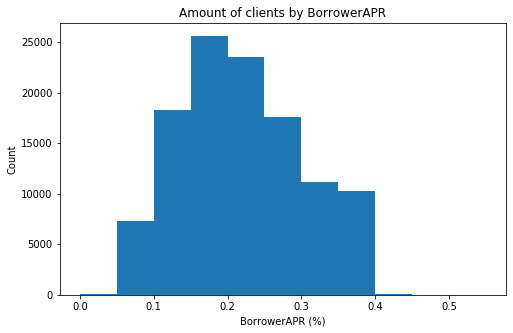

In [12]:
binsize = 0.05
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR (%)')
plt.ylabel("Count")
plt.title("Amount of clients by BorrowerAPR")
plt.show()

# Distribution of Borrower Rates

>The lowest rates are 0% and highest 0.37%. The largest amount of clients which is around 15 000 clients have a borrower rate ofbetween 0.12% and 0.13%

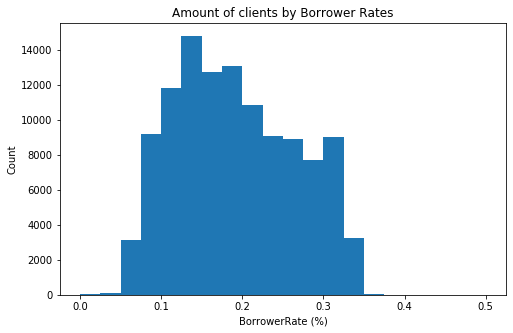

In [13]:
binsize = 0.025
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')
plt.ylabel("Count")
plt.title("Amount of clients by Borrower Rates")
plt.show()

# Loan Status by BorrowerHomeOwner

> The graph inidicates that most clients who have the 'current' loan status payments are home owners. There isn't a big difference by those who have the 'completed' loan status, home owners are around 19 000 and non homeowners around 20 000. Majority of the clients' other loan statuses are not home owners.

Text(0.5, 1.0, 'Amount of clients by Loan Status according to HomeOwnership')

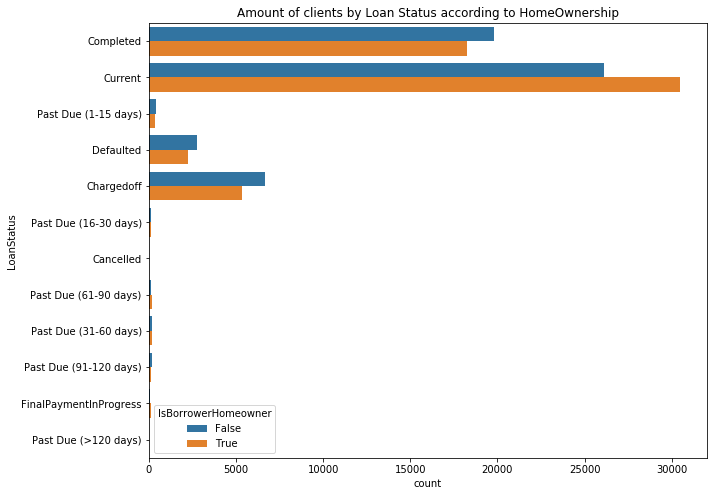

In [14]:
plt.figure(figsize=[10, 8])
sns.countplot(data = df, y = 'LoanStatus', hue = 'IsBorrowerHomeowner')
plt.title("Amount of clients by Loan Status according to HomeOwnership")

# Loan Status by Credit Score

>The boxplot indicates that those whoare in their final payments and current statuses have slightly higher higher credit scores than the rest. Thsoe in the completed statust have slighlty higher credit scores than those with past due statuses. Those with cancelled statuses have the lowest credit scores with the defaulted and charged off statuses following with low credit scores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

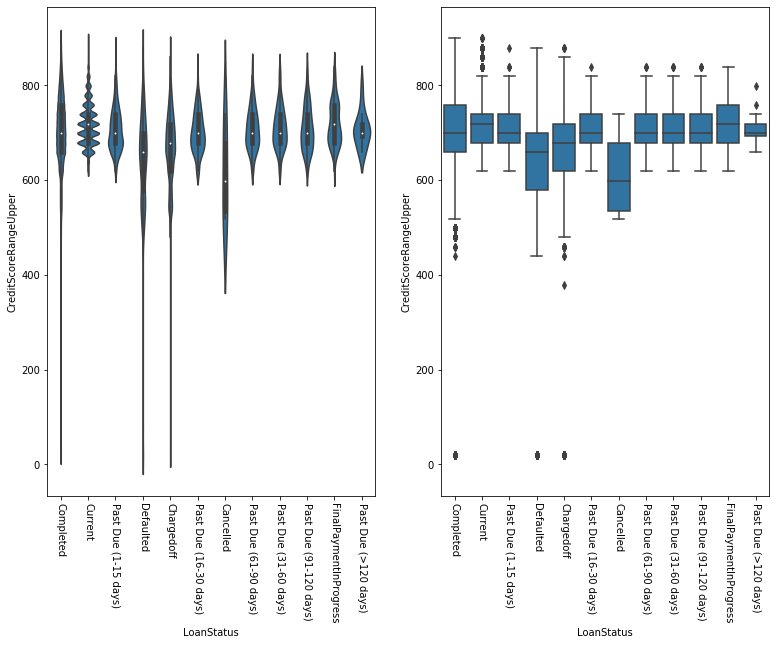

In [15]:
plt.figure(figsize = [20, 9])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sns.violinplot(data = df, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.xticks(rotation = 270)

# right plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 270)

# Loan Status's Borrower Rates by Income

>Here we can see that income range affects the borrower rates for each laon status. Clients with higher income ranges have lower rates and those in the lower income ranges have higher rates in most loan statuses. There's a pattern in the past due loan statuses where clients with little to no income have high borrow rates. The current and completed statuses have lower rates for the higher income ranges. The final payments doesn't include unemployed and zero dollar income ranges as those in those ranges will unlikely be able to pay through their loans.

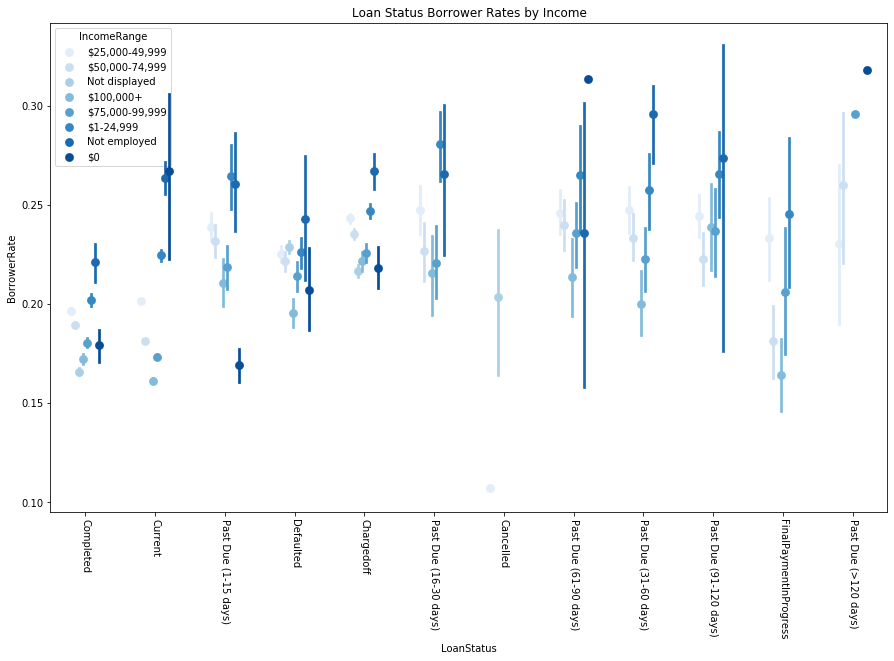

In [16]:
fig = plt.figure(figsize = [15,9])
ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Status Borrower Rates by Income')
plt.ylabel('BorrowerRate')
plt.xticks(rotation = 270)
plt.show();

# Loan Status by Annual Borrower Rates and Term

>Term indicates the length of the loan and it is given in months, 12months, 36months, and 60months. 
Here we can see that for the past due, completed and defaulted status rates are lower for the 60 month term loans, and higher annual rates for shorter term loans. Those in their final payments have lower rates for the 12 month term. 

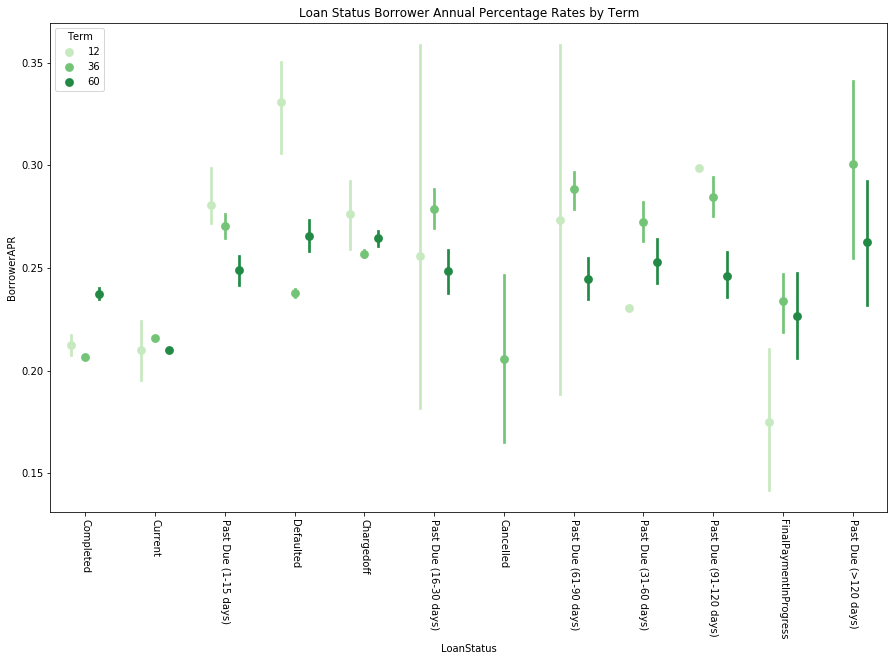

In [17]:
fig = plt.figure(figsize = [15,9])
ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Status Borrower Annual Percentage Rates by Term')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation = 270)
plt.show();

# Loan Status by Borrow Rate and Employment Status

>Here we can see in the past due statuses that clients that are employed, employed full time and self-employed have lower rates than those that are unemployed. The final payment status indicates that those employed full time have lower rates than the rest, the same applies for the current status.Those with completed loans have lower rates for part-time, retired and higher rates for full time employees.

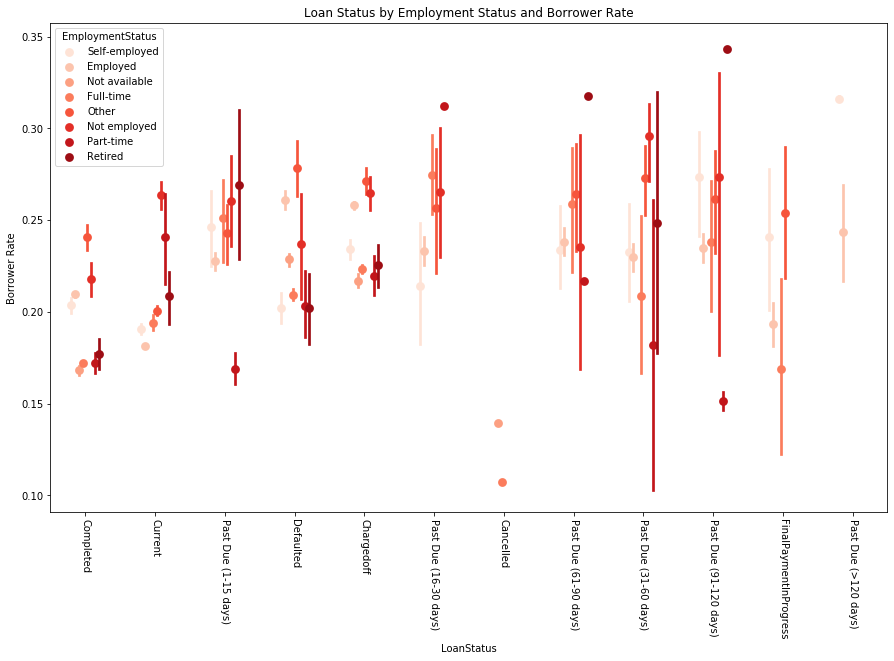

In [18]:
fig = plt.figure(figsize = [15,9])

ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Reds', linestyles = '', dodge = 0.4)
plt.title('Loan Status by Employment Status and Borrower Rate')
plt.ylabel('Borrower Rate')
plt.xticks(rotation = 270)
plt.show();